# Import Dependencies

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Need to convert date into number by breaking it down by (year, month, day)
last_date= session.query(func.max(Measurement.date)).first()
print(last_date)


('2017-08-23',)


In [11]:
# Check format for date column
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Check format for date column
columns = inspector.get_columns('Station')
for col in columns:
    print(col['name'], col["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:

# Convert from tuple to list to make modifications
latest_date =  list(np.ravel(last_date))

# Breaking it down by (year, month, day) by position of text 
# Coverting it to Integer to use it to calculate date from 1 year ago
year = int(latest_date[0][0]+latest_date[0][1]+latest_date[0][2]+latest_date[0][3])
month =int(latest_date[0][5]+latest_date[0][6])
date = int(latest_date[0][8]+latest_date[0][9])

print(latest_date)
print(year)
print(month)
print(date)

['2017-08-23']
2017
8
23


In [14]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(year, month, date) - dt.timedelta(days=365)
year_later = dt.date(year,month, date)
print(year_ago)
print(year_later)

2016-08-23
2017-08-23


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
one_year_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_ago).all()
one_year_prcp

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
one_year_prcp_df = pd.DataFrame(one_year_prcp, columns=['date', 'precipitation'])
one_year_prcp_df.set_index('date', inplace=True)

one_year_prcp_df

,precipitation
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [17]:
# Sort the dataframe by date
one_year_prcp_df_by_date = one_year_prcp_df.sort_index()
one_year_prcp_df_by_date 

,precipitation
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


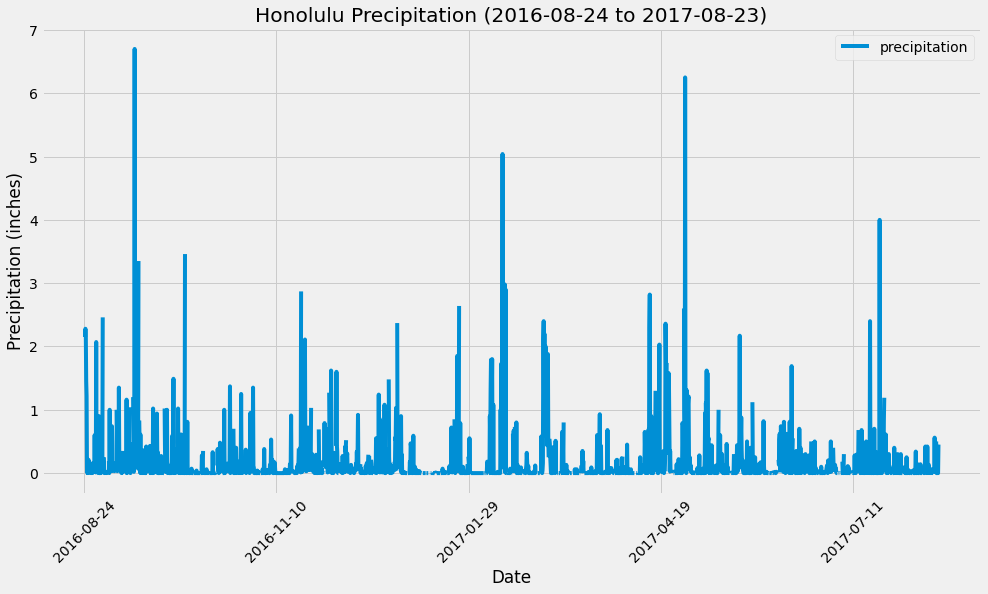

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
one_year_prcp_df_by_date.plot(figsize=(15,8), label="Precipitation", rot=45)
plt.title ("Honolulu Precipitation (2016-08-24 to 2017-08-23)")
plt.ylabel("Precipitation (inches)")
plt.xlabel("Date")
plt.legend(loc="upper right")
plt.savefig("Output Files/Annual Precipitation")
plt.show()


In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
one_year_prcp_df_by_date .describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
stations= session.query(Station.station).count()
stations

9

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?

# Join the two databases to get station names & count of stations observed
# List the stations and the counts in descending order.
select = [Measurement.station,Station.name,func.count(Measurement.station)]
station_counts = session.query(*select).filter(Measurement.station == Station.station).\
                 group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_counts

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [22]:
station_counts_df=pd.DataFrame(station_counts, columns=['station', 'name', 'count'])
most_active_station_id = station_counts_df.iloc[0,0]
most_active_station_name = station_counts_df.iloc[0,1]
print(f'The most active station is {most_active_station_id} - {most_active_station_name} with {station_counts_df.iloc[0,2]} records.')


The most active station is USC00519281 - WAIHEE 837.5, HI US with 2772 records.


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station_temp=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                         filter(Measurement.station =='USC00519281').all()
print(most_active_station_temp)

#Turn tuple to list
temp_list =  list(np.ravel(most_active_station_temp))

#Output
print(f'{most_active_station_id} - {most_active_station_name} min temperature is {temp_list[0]},max temperature is {temp_list[1]}, and average temperature is {round(temp_list[2])},')

[(54.0, 85.0, 71.66378066378067)]
USC00519281 - WAIHEE 837.5, HI US min temperature is 54.0,max temperature is 85.0, and average temperature is 72.0,


In [24]:
# Choose the station with the highest number of temperature observations.

most_active_yearly_temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > year_ago).filter(Measurement.station == most_active_station_id).all()
most_active_yearly_temp

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [25]:
# Sort the dataframe by date
most_active_yearly_temp_df = pd.DataFrame(most_active_yearly_temp)
most_active_yearly_temp_df


,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


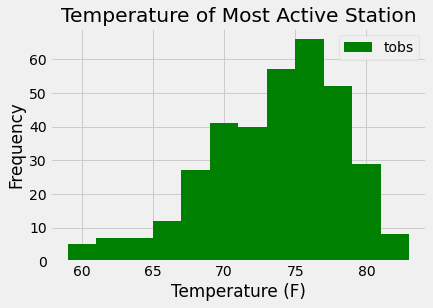

In [26]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

plt.hist(most_active_yearly_temp_df['tobs'], bins = 12, color = 'green', density = False, label = "tobs")
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend()
plt.title("Temperature of Most Active Station")
plt.savefig("Output Files/Annual Temperature")
plt.show()


## Temperature Analysis 1

In [27]:
#Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.

#Display June Data
june_data = session.query(func.avg(Measurement.tobs)).group_by(Measurement.station).\
            filter(func.strftime("%m", Measurement.date) == '06').all()

june_data

[(74.13939393939394),
 (74.05084745762711),
 (76.00537634408602),
 (71.9372197309417),
 (76.6554054054054),
 (73.39473684210526),
 (73.27118644067797),
 (77.55932203389831),
 (76.66810344827586)]

In [28]:
december_data = session.query(func.avg(Measurement.tobs)).group_by(Measurement.station).\
                filter(func.strftime("%m", Measurement.date) == '12').all()
december_data

[(69.6842105263158),
 (71.06944444444444),
 (73.2247191011236),
 (69.29126213592232),
 (71.8348623853211),
 (72.42105263157895),
 (69.90322580645162),
 (71.10952380952381),
 (72.43333333333334)]

#### T-Test

In [29]:
#Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Wh
print("Null Hypothesis:  The mean difference is 0")
print("Alternate Hypothesis:  The mean difference is greater than 0")

stats.ttest_ind(june_data, december_data, equal_var=False) 



Null Hypothesis:  The mean difference is 0
Alternate Hypothesis:  The mean difference is greater than 0


Ttest_indResult(statistic=array([4.61586542]), pvalue=array([0.00036573]))

In [30]:
print("Results:Since the p-value is almost 0.0004 , there is a significant difference in the mean temperatures in June and December")

print("Paired t-tests are considered more powerful than unpaired t-tests because using the same samples eliminiate variation between the samples that could be caused by anything other than what’s being tested.")

Results:Since the p-value is almost 0.0004 , there is a significant difference in the mean temperatures in June and December
Paired t-tests are considered more powerful than unpaired t-tests because using the same samples eliminiate variation between the samples that could be caused by anything other than what’s being tested.


## Temperature Analysis 2


In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, andTMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Dates for my trip
start_date = '2020-08-02'
end_date = '2020-08-10'

In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def change_year(year):
    convert_year = year.replace('2020', '2017')
    return(convert_year)

start_date = change_year(start_date)
end_date = change_year(end_date)

print(start_date)
print(end_date)

print(calc_temps(start_date, end_date))

2017-08-02
2017-08-10
[(71.0, 79.54285714285714, 83.0)]


In [34]:
#Create List to plot
mytrip_temp_list = list(np.ravel(calc_temps(start_date, end_date)))

#Create values to plot
mytrip_tavg = mytrip_temp_list[1]
mytrip_yerror = mytrip_temp_list[2] - mytrip_temp_list[0]                        


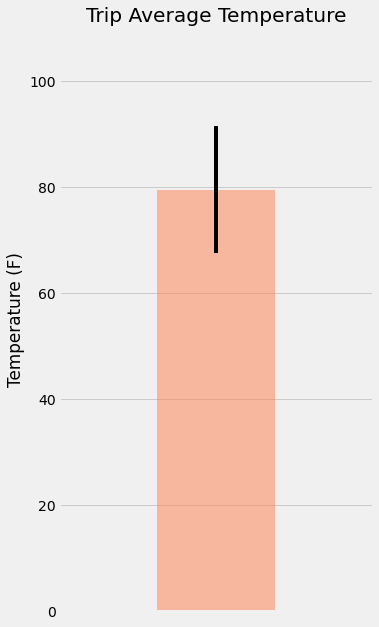

In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


fig, ax = plt.subplots(figsize = (5,10))
ax.bar(1, mytrip_tavg, yerr=mytrip_yerror, alpha=0.5, color = 'coral', width = 0.3)
ax.set_ylabel('Temperature (F)')
ax.set_title('Trip Average Temperature')
ax.xaxis.grid()
ax.axes.xaxis.set_visible(False)
# Save the figure and show
plt.xlim(0.6, 1.4)
plt.ylim(0,110)
plt.savefig("Output Files/Trip Average Temperature")
plt.show()


## Daily Rainfall Average

In [36]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

#Choose columns/queries to display 
select = [Measurement.station,Station.name,Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

#Query results by merging measurement and station tables
total_rainfall_trip = session.query(*select).filter(Measurement.station == Station.station).\
filter(Measurement.date >= start_date , Measurement.date<= end_date ).\
group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

# Change to Panda Dataframe so it is easier to read.

total_rainfall_trip = pd.DataFrame(total_rainfall_trip, 
                                   columns = ['Station', 'Name', 'Latitude', 'Longitude', 'Elevation', 'Total Rainfall'])
total_rainfall_trip

,Station,Name,Latitude,Longitude,Elevation,Total Rainfall
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.92
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.20
2,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.06
3,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.02
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.00


In [37]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [38]:
# calculate the daily normals for your trip

# Set the start and end date of the trip
start_date = '2020-08-02'
end_date = '2020-08-10'



# Change the dates from string to date formats
trip_start_date = dt.datetime.strptime(start_date,'%Y-%m-%d')
trip_end_date = dt.datetime.strptime(end_date,'%Y-%m-%d') 
delta = trip_end_date - trip_start_date

# Use the start and end date to create a range of dates

date_list = []

for i in range(delta.days + 1):
    day = trip_start_date + dt.timedelta(days=i)
    # Strip off the year and save a list of %m-%d strings
    month_day = dt.datetime.strftime(day,'%m-%d')
    date_list.append(month_day)
    
date_list

['08-02',
 '08-03',
 '08-04',
 '08-05',
 '08-06',
 '08-07',
 '08-08',
 '08-09',
 '08-10']

In [39]:
# push each tuple of calculations into a list called `normals`
normals = []

# Loop through the list of %m-%d strings and calculate the normals for each date

for day in date_list:
    # Using index 0 to get rid of extra square brackets so normals list can be used to convert into pd DataFrame & plotting 
    daily_tempinfo = daily_normals(day)[0]
    normals.append(daily_tempinfo)
normals

[(68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0),
 (68.0, 76.5576923076923, 83.0),
 (69.0, 75.98039215686275, 81.0),
 (65.0, 76.42, 83.0)]

In [40]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# Use the [0] to get rid of the commas after date
normals_df = pd.DataFrame(normals, columns = ['Tmin', 'Tavg', 'Tmax'], index=[date_list][0])
normals_df


,Tmin,Tavg,Tmax
08-02,68.0,75.603774,84.0
08-03,70.0,76.611111,85.0
08-04,69.0,76.711538,84.0
08-05,69.0,76.148148,82.0
08-06,67.0,76.250000,83.0
08-07,71.0,77.156863,83.0
08-08,68.0,76.557692,83.0
08-09,69.0,75.980392,81.0
08-10,65.0,76.420000,83.0


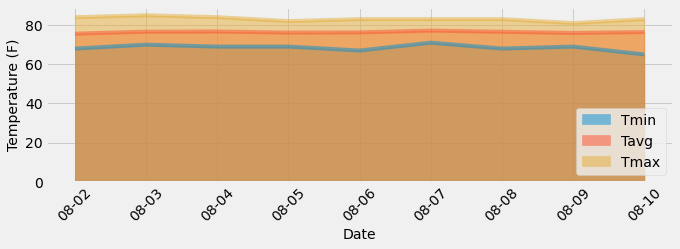

In [42]:
# Plot the daily normals as an area plot with `stacked=False`

ax = normals_df.plot.area(stacked=False, rot = 45, figsize=(10,3))
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Temperature (F)", fontsize = 14)
plt.legend(loc='lower right')
plt.savefig("Output Files/Daily Normals")
plt.show()